## 개요

---

### 분석 목표

본 데이터는 2022년도 **온라인 교육 플랫폼**의 사용자 데이터베이스입니다. \
이 데이터를 통해 플랫폼의 전략적인 의사결정을 지원할 수 있는 인사이트를 도출하는 것을 목표로 합니다.

### 예상 결과물

1. **기업 매출 현황 분석**
   - 기간별 매출 변동 사항
   - 주요 매출 기여 요인 분석

2. **매출과 할인율 간의 상관관계 분석**
   - 할인 캠페인별 매출 변화 분석
   - 할인율과 매출 간의 인과관계 도출

3. **할인율 조정을 통한 매출 최적화 모델 개발**
   - 저매출 구간 대상 할인율 조정 방안
   - 조정된 할인율에 따른 매출 증감 예측

In [2]:
# 모듈 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
import warnings
from datetime import datetime
warnings.filterwarnings(action='ignore')
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic')
        plt.rcParams['axes.unicode_minus'] = False

In [3]:
#데이터셋 설정
order = pd.read_csv("C:/Users/user/Desktop/Data-Analysis-Portfolio/마케팅 데이터 분석 2024.04.19/Dataset/order_9968.csv")
course = pd.read_csv("C:/Users/user/Desktop/Data-Analysis-Portfolio/마케팅 데이터 분석 2024.04.19/Dataset/course-9968.csv")
customer = pd.read_excel("C:/Users/user/Desktop/Data-Analysis-Portfolio/마케팅 데이터 분석 2024.04.19/Dataset/customer-9968.xlsx")
refund = pd.read_csv("C:/Users/user/Desktop/Data-Analysis-Portfolio/마케팅 데이터 분석 2024.04.19/Dataset/refund-9968.csv")
user = pd.read_csv("C:/Users/user/Desktop/Data-Analysis-Portfolio/마케팅 데이터 분석 2024.04.19/Dataset/user-9968.csv")

## 데이터 전처리
---

### 데이터 Info Check

**칼럼명, 변수값 설명은 Dataset Info 파일을 참조해주세요.**

>데이터 타입 변경

In [4]:
order['created_at'] = pd.to_datetime(order['created_at'])
order['updated_at'] = pd.to_datetime(order['updated_at'])

본 분석에서는 order DataFrame만 활용하기 때문에,\
created_at, updated_at 칼럼의 타입을 object -> datetime으로 변경하였음.

>분석용 Dataset 생성

In [5]:
#결제 상태가 '완료' 상태인 데이터
order_com = order[order['state'] == 'COMPLETED']
##2022년 데이터
order_t = order[order['created_at'].dt.year == 2022]

### 결측치 확인

In [6]:
# 각 데이터프레임의 결측치 합계 계산
null_order = order.isnull().sum()
null_course = course.isnull().sum()
null_customer = customer.isnull().sum()
null_refund = refund.isnull().sum()
null_user = user.isnull().sum()

# 결측치 합계를 데이터프레임으로 합치기
null_summary = pd.concat([null_order, null_course, null_customer, null_refund, null_user], axis=1)
null_summary.columns = ['order', 'course', 'customer', 'refund', 'user']  # 칼럼명 지정

null_summary

,order,course,customer,refund,user
id,0.0,0.0,0.0,0.0,0.0
type,0.0,0.0,0.0,0.0,0.0
state,0.0,0.0,0.0,0.0,0.0
name,0.0,NaN,0.0,NaN,NaN
created_at,0.0,0.0,0.0,0.0,0.0
updated_at,0.0,0.0,0.0,0.0,0.0
customer_id,0.0,NaN,NaN,NaN,NaN
list_price,0.0,NaN,NaN,NaN,NaN
sale_price,0.0,NaN,NaN,NaN,NaN
discount_price,0.0,NaN,NaN,NaN,NaN


course DataFrame의 description column이 **169개**의 결측치 \
course DataFrame의 closed_at column이 **707개**의 결측치 \
course DataFrame의 total_class_hours column이 **144개**의 결측치 \
course DataFrame의 keywords column이 **182개**의 결측치 \
refund DataFrame의 course_id column이 **599개**의 결측치 를 가진다.


>course DataFrame 결측치 분석

- description column
강의의 부가 설명이 담긴 칼럼으로, 결측치의 경우 부가 설명이 없는것으로 간주한다.
- closed_at column
폐강된 강의의 날짜를 기록한 칼럼이기 떄문에 결측값의 경우 강의가 아직 폐강되지 않았음을 뜻한다.
- totasl

### 이상치 처리 

## EDA
---

### Order DataFrame

#### 매출 분석
> 일 별 매출

In [ ]:
#할인율 추가
order_t['discount_per'] = ((order_t['discount_price'] / order['list_price']) * 100)

#연월일만 표시한 year_month_day 칼럼 추가
order_t['year_month_day'] = order_t['created_at'].dt.strftime('%Y-%m-%d')
order_t['year_month_day'] = pd.to_datetime(order_t['year_month_day'])

#시각화를 위한 groupby
order_t_com = order_t.groupby('year_month_day').agg({
                                        'list_price' : 'sum',
                                        'sale_price' : 'sum',
                                        'discount_per' : 'mean'
}).reset_index()

In [ ]:
#시각화
import pandas as pd

# 7일 및 30일 이동 평균 계산
order_t_com['7_day_MA'] = order_t_com['list_price'].rolling(window=7).mean()
order_t_com['30_day_MA'] = order_t_com['list_price'].rolling(window=30).mean()

# Plotly 시각화
import plotly.graph_objects as go

fig = go.Figure()

# 매출 합계에 대한 선 그래프 추가
fig.add_trace(go.Scatter(x=order_t_com['year_month_day'], y=order_t_com['list_price'],
                         mode='lines+markers', name='매출 합계'))

fig.add_trace(go.Scatter(x=order_t_com['year_month_day'], y=order_t_com['sale_price'],
                         mode='lines+markers', name='순매출 합계'))

# 7일 이동 평균선 추가
fig.add_trace(go.Scatter(x=order_t_com['year_month_day'], y=order_t_com['7_day_MA'],
                         mode='lines', name='7일 이동 평균'))

# 30일 이동 평균선 추가
fig.add_trace(go.Scatter(x=order_t_com['year_month_day'], y=order_t_com['30_day_MA'],
                         mode='lines', name='30일 이동 평균'))

# 레이아웃 설정
fig.update_layout(title='2022년 일별 매출 그래프',
                  xaxis_title='날짜',
                  yaxis_title='매출 합계',
                  legend=dict(x=0.01, y=0.99, bordercolor='Black', borderwidth=1))

# 그래프 출력
fig.show()

구매가 많이 발생하는 구간은 \
**1월 3일 ~ 1월 9일 연초**\
**12월 9일 ~ 12월 31일 연말**이며\
나머지 구간은 대체로 평이하다.

가장 많은 구매가 발생한 날은 1월 3일, 2월 28일, 8월 31일이다.\
**1월 3일은 설 이후 새해가 시작되는 날**\
**2월 28일, 8월 31일은 대학생 방학 마지막 날이다.**\
위와같은 이유에서 구매가 많이 발생한것으로 예상된다.

이러한 분석을 통해,\
 **패스트캠퍼스 플랫폼의 매출 패턴이 대학생들의 생활 주기와 밀접하게 연관되어 있음을 확인할 수 있다.**

>할인율 분석

In [ ]:
import plotly.graph_objects as go

# 시계열 그래프 생성
fig = go.Figure()

# 매출 합계에 대한 선 그래프 추가
fig.add_trace(go.Scatter(x=order_t_com['year_month_day'], y=order_t_com['list_price'],
                         mode='lines+markers', name='매출 합계'))

# 할인율 평균에 대한 선 그래프 추가
fig.add_trace(go.Scatter(x=order_t_com['year_month_day'], y=order_t_com['discount_per'],
                         mode='lines+markers', name='할인율 평균', yaxis='y2'))

# 레이아웃 설정
fig.update_layout(title='일별 매출량과 할인율 그래프',
                  xaxis_title='날짜',
                  yaxis_title='매출 합계',
                  yaxis2=dict(title='할인율 평균', overlaying='y', side='right'),
                  legend=dict(x=0.01, y=0.99, bordercolor='Black', borderwidth=1))

# 그래프 출력
fig.show()

 위 그래프를 보면, 할인율이 높은 날에 매출또한 높은 경향을 보인다\
이는 **할인율은 매출에 큰 영향을 준다**는 가설을 세워볼 수 있게 한다.

 특이점으로
앞서 언급한 1월3일은 높은 할인율로 인한 매출량 증가를 이끌어 냈지만,\
2월 28일, 8월 31일은 할인율이 크지 않음에도 압도적인 매출을 낸 사실이다.\
이는 새 학기가 시작하기 전, 강의를 구매할까 망설이는 대학생 고객들이 구매결정을 한 것으로 예상된다.

**높은 할인율이 고객의 구매를 이끌어 내지만,\
반대로 할인 프로모션이 없는 기간의 매출량이 현저하게 떨어지며 특정 주기에 매출이 몰려있는 경향을 보인다.**

#### 요일 분석

In [7]:
# 분석용 데이터셋 생성
order_ = order.copy()

order_['day_of_week'] = order_['created_at'].dt.day_name()

# 요일 순서를 정의
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# day_of_week를 Categorical 타입으로 변환하고 순서를 지정
order_['day_of_week'] = pd.Categorical(order_['day_of_week'], categories=day_order, ordered=True)
# 요일 순서로 정렬
order_ = order_.sort_values('day_of_week')


order_day = order_.groupby('day_of_week')['id'].count().reset_index()
order_day['per'] = ((order_day['id'] / order_day['id'].sum()) * 100).round(1)
order_day

,day_of_week,id,per
0,Monday,49536,17.4
1,Tuesday,38493,13.6
2,Wednesday,42147,14.8
3,Thursday,39012,13.7
4,Friday,41788,14.7
5,Saturday,28241,9.9
6,Sunday,44818,15.8


월요일, 일요일 결제가 가장 많았으며\
토요일의 결제율이 현저히 낮은것으로 보인다.

#### 재방문율 분석

In [ ]:
order_count = order_t.groupby(['customer_id']).size().reset_index(name='count')
order_count

# order_no 구간 나누기
def label_order_range(row):
    if row['count'] == 1:
        return '01 : 최초 구매자'
    elif 2 <= row['count'] <= 4:
        return '02 : 2회 이상 구매자'
    elif 5 <= row['count'] <= 10:
        return '03 : 5회 이상 구매자'
    else:
        return '04: 10회이상 구매자'

order_count['order_range'] = order_count.apply(label_order_range, axis =1)

# 구간별 고객 수 계산
order_counts = order_count.groupby('order_range').size().reset_index(name='count')
order_counts.sort_values('order_range', inplace = True)

# 전체 고객 수를 사용하여 각 구간의 비율 계산
total_count = order_count['customer_id'].count()
order_counts['percentage'] = (order_counts['count'] / total_count * 100).round(2)

# Plotly 막대그래프 생성
fig = px.bar(order_counts, x='order_range', y='count', text='percentage',
             title='모바일 고객 구간 별 재방문율',
             labels={'order_range': '', 'count': '고객 수', 'percentage': 'Percentage'})
fig.update_traces(texttemplate='%{text}%', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()


### Course DataFrame
---

#### 키워드 분석

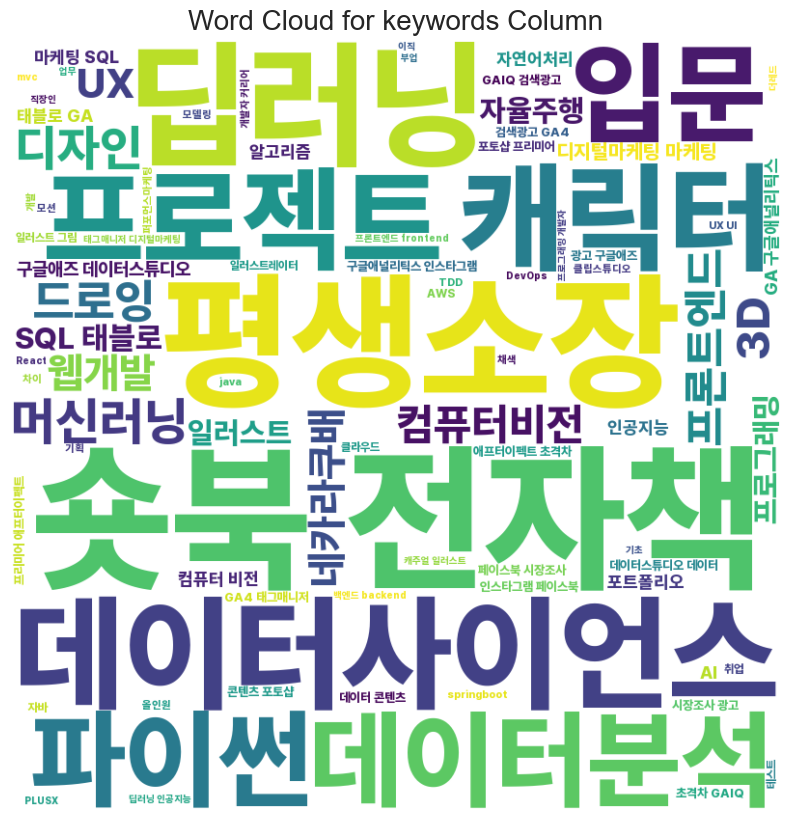

In [26]:
#분석용 데이터 셋 생성
course_ = course.copy()
course_

#2022년 데이터만
course_2022 = course_[(course_['created_at'] >= '2022-01-01') & (course_['created_at'] <= '2022-12-31')]
course_2022

# 쉼표로 단어를 분리하고, 각 단어를 새 행으로 확장
course_expanded = course_2022['keywords'].str.split(',').explode().reset_index(drop=True)

# 새로운 데이터 프레임 생성
keyword_2022 = pd.DataFrame({'keywords': course_expanded})

##워드 클라우드 생성
from wordcloud import WordCloud

def generate_wordclouds(dataframe):
    # 한글 폰트 경로 설정
    font_path = "C:/Users/user/Downloads/Pretendard-1.3.9/web/static/woff/Pretendard-ExtraBold.woff"  
    # 데이터 프레임의 각 칼럼에 대해 워드 클라우드 생성
    for column in dataframe.columns:
        # 칼럼 값들을 문자열로 변환하고 이어붙임
        text = ' '.join(str(v) for v in dataframe[column].dropna())
        
        # 워드 클라우드 객체 생성, 한글 폰트 사용
        wordcloud = WordCloud(
            font_path=font_path,
            width = 800, height = 800,
            background_color ='white',
            min_font_size = 10
        ).generate(text)
        
        # 워드 클라우드 시각화
        plt.figure(figsize = (8, 8), facecolor = None)
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.title(f"Word Cloud for {column} Column", fontdict={'fontsize': 20})
        plt.axis("off")
        plt.tight_layout(pad = 0)
        plt.show()


# 워드 클라우드 생성 함수 호출
generate_wordclouds(keyword_2022)

평생소장, 프로그래밍, 데이터사이언스, 마케팅, 디자인 키워드가 많이 언급되는것으로 확인된다.

### Refund DataFrame
---

#### 환불 발생 구간 분석

In [11]:
#분석용 데이터셋 설정
refund['created_at'] = pd.to_datetime(refund['created_at'])
refund['updated_at'] = pd.to_datetime(refund['created_at'])

refund_t = refund[refund['created_at'].dt.year == 2022]
refund_t

,id,type,state,created_at,updated_at,user_id,course_id,amount,tax_free_amount
0,72124,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 07:29:00,2022-12-30 07:29:00,619833.0,214323.0,-20000,-20000
1,72121,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 07:01:00,2022-12-30 07:01:00,146614.0,213905.0,-10000,-10000
2,72119,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 06:08:00,2022-12-30 06:08:00,541404.0,214402.0,0,0
3,72117,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 06:00:00,2022-12-30 06:00:00,1056095.0,203935.0,-10000,-10000
4,72116,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 05:57:00,2022-12-30 05:57:00,98880.0,213244.0,-20000,-20000
...,...,...,...,...,...,...,...,...,...
12669,44843,ADMIN_AUTO_REFUND,COMPLETED,2022-01-03 01:09:00,2022-01-03 01:09:00,710222.0,206848.0,-70000,-70000
12670,44842,ADMIN_AUTO_REFUND,COMPLETED,2022-01-03 01:07:00,2022-01-03 01:07:00,723215.0,NaN,-70000,-70000
12671,44841,ADMIN_AUTO_REFUND,COMPLETED,2022-01-03 01:06:00,2022-01-03 01:06:00,744769.0,203720.0,-10000,-10000
12672,44840,ADMIN_AUTO_REFUND,COMPLETED,2022-01-03 01:05:00,2022-01-03 01:05:00,1345.0,204366.0,-10000,-10000


In [12]:
# amount값을 양수로 변환
refund_t['amount'] = refund_t['amount'].abs()
refund_t['tax_free_amount'] = refund_t['tax_free_amount'].abs()

#연월일만 표시한 year_month_day 칼럼 추가
refund_t['year_month'] = refund_t['created_at'].dt.strftime('%Y-%m')
refund_t['year_month'] = pd.to_datetime(refund_t['year_month'])


refund_amount = refund_t.groupby('year_month').agg({
                                                     'amount' : 'sum',
                                                     'id' : 'count'
}).reset_index()

#시각화
import plotly.graph_objects as go

# 환불 금액의 총액 계산
total_refund = refund_amount['amount'].sum()
total_refund_ = refund_amount['id'].sum()

# 시계열 그래프 생성
fig = go.Figure()

# 환불 금액에 대한 선 그래프 추가
fig.add_trace(go.Scatter(x=refund_amount['year_month'], y=refund_amount['amount'],
                         mode='lines+markers',
                         name='환불 금액'))

fig.add_trace(go.Scatter(x=refund_amount['year_month'], y=refund_amount['id'],
                         mode='lines+markers',
                         name='환불 건수',
                         yaxis='y2'))
# 레이아웃 설정
fig.update_layout(title='월별 환불금액 그래프',
                  xaxis_title='연월',
                  yaxis_title='환불 금액',
                  yaxis2=dict(title='환불 건수', overlaying='y', side='right'),
                  legend=dict(x=0.01, y=0.99, bordercolor='Black', borderwidth=1))

# 환불 금액의 총액을 그래프에 텍스트로 추가
fig.add_annotation(xref='paper', yref='paper', x=0.95, y=0.95,
                   text=f"총 환불 금액: {total_refund:,.0f}",
                   showarrow=False,
                   font=dict(size=14, color="blue"),
                   align="right",
                   bgcolor="white",
                   bordercolor="black",
                   borderwidth=2,
                   borderpad=4)

# 환불 건수의 합을 그래프에 텍스트로 추가
fig.add_annotation(xref='paper', yref='paper', x=0.95, y=0.85,
                   text=f"총 환불 건수: {total_refund_:,.0f}",
                   showarrow=False,
                   font=dict(size=14, color="blue"),
                   align="right",
                   bgcolor="white",
                   bordercolor="black",
                   borderwidth=2,
                   borderpad=4)

# 그래프 출력
fig.show()

총 환불액은 약 2.2억이며, 총 매출액인 80.3억의 약 2.7%를 차지한다.\
총 환불 건수는 12,674건이며, 총 주문량인 2084035건의 약 0.6%를 차지한다.\
**환불 건수에 비해 환불액의 비율이 높은것을 알 수 있다** 

매출액이 높았던 연초, 연말에 환불이 많이 발생한것으로 보아\
**환불액의 주기는 매출액의 주기를 따르는 것으로 보인다.**\
특정한 날에 환불이 많이 발생했는지 알아보기 위해 일별 그래프도 그려보았다.

In [13]:
#연월일만 표시한 year_month_day 칼럼 추가
refund_t['year_month_day'] = refund_t['created_at'].dt.strftime('%Y-%m-%d')
refund_t['year_month_day'] = pd.to_datetime(refund_t['year_month_day'])


refund_amount_ = refund_t.groupby('year_month_day').agg({
                                                        'amount' : 'sum',
                                                        'id' : 'count'}).reset_index()

#시각화
import plotly.graph_objects as go

# 환불 금액의 총액 계산
total_refund__ = refund_amount_['amount'].sum()
total_refund___ = refund_amount_['id'].sum()

# 시계열 그래프 생성
fig = go.Figure()

# 환불 금액에 대한 선 그래프 추가
fig.add_trace(go.Scatter(x=refund_amount_['year_month_day'], y=refund_amount_['amount'],
                         mode='lines+markers',
                         name='환불 금액'))

fig.add_trace(go.Scatter(x=refund_amount_['year_month_day'], y=refund_amount_['id'],
                         mode='lines+markers',
                         name='환불 건수',
                         yaxis='y2'))

# 레이아웃 설정
fig.update_layout(title='일별 환불금액 그래프',
                  xaxis_title='연월',
                  yaxis_title='환불 금액',
                  legend=dict(x=0.01, y=0.99, bordercolor='Black', borderwidth=1),
                  yaxis2=dict(title='환불 건수', overlaying='y', side='right'))

# 환불 금액의 총액을 그래프에 텍스트로 추가
fig.add_annotation(xref='paper', yref='paper', x=0.95, y=0.95,
                   text=f"총 환불 금액: {total_refund__:,.0f}",
                   showarrow=False,
                   font=dict(size=14, color="blue"),
                   align="right",
                   bgcolor="white",
                   bordercolor="black",
                   borderwidth=2,
                   borderpad=4)
# 환불 건수의 합을 그래프에 텍스트로 추가
fig.add_annotation(xref='paper', yref='paper', x=0.95, y=0.85,
                   text=f"총 환불 건수: {total_refund___:,.0f}",
                   showarrow=False,
                   font=dict(size=14, color="blue"),
                   align="right",
                   bgcolor="white",
                   bordercolor="black",
                   borderwidth=2,
                   borderpad=4)

# 그래프 출력
fig.show()

일별 그래프를 확인해보니, 2022년 2월 3일에 과도한 환불이 발생한것으로 보인다.\

#### 환불이 많이 발생한 강의 

In [27]:
# '-' 다음에 오는 모든 문자 추출
course['course_id'] = course['title'].str.extract('.*-\s*(.*)')

course['course_id'] = course['course_id'].astype(float)

result = pd.merge(refund, course, on='course_id', how='inner')
result

,id_x,type_x,state_x,created_at_x,updated_at_x,user_id,course_id,amount,tax_free_amount,id_y,type_y,state_y,created_at_y,updated_at_y,title,description,close_at,total_class_hours,keywords
0,72124,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 07:29:00,2022-12-30 07:29:00,619833.0,214323.0,-20000,-20000,214323,COURSE,ONGOING,2022-11-24 9:18,2023-11-30 6:37,[쉐어엑스]플러스엑-214323,프로젝트 매니지먼트,NaN,10.0,"PLUSX\t, UXPACK\t, PROCESS\t, 플엑\t, 플러스엑스\t, u..."
1,72108,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 05:35:00,2022-12-30 05:35:00,1072475.0,214323.0,-20000,-20000,214323,COURSE,ONGOING,2022-11-24 9:18,2023-11-30 6:37,[쉐어엑스]플러스엑-214323,프로젝트 매니지먼트,NaN,10.0,"PLUSX\t, UXPACK\t, PROCESS\t, 플엑\t, 플러스엑스\t, u..."
2,72103,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 05:14:00,2022-12-30 05:14:00,1072709.0,214323.0,-20000,-20000,214323,COURSE,ONGOING,2022-11-24 9:18,2023-11-30 6:37,[쉐어엑스]플러스엑-214323,프로젝트 매니지먼트,NaN,10.0,"PLUSX\t, UXPACK\t, PROCESS\t, 플엑\t, 플러스엑스\t, u..."
3,72102,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 05:11:00,2022-12-30 05:11:00,956366.0,214323.0,-20000,-20000,214323,COURSE,ONGOING,2022-11-24 9:18,2023-11-30 6:37,[쉐어엑스]플러스엑-214323,프로젝트 매니지먼트,NaN,10.0,"PLUSX\t, UXPACK\t, PROCESS\t, 플엑\t, 플러스엑스\t, u..."
4,72007,ADMIN_AUTO_REFUND,COMPLETED,2022-12-30 00:17:00,2022-12-30 00:17:00,383705.0,214323.0,-20000,-20000,214323,COURSE,ONGOING,2022-11-24 9:18,2023-11-30 6:37,[쉐어엑스]플러스엑-214323,프로젝트 매니지먼트,NaN,10.0,"PLUSX\t, UXPACK\t, PROCESS\t, 플엑\t, 플러스엑스\t, u..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11810,46089,ADMIN_AUTO_REFUND,COMPLETED,2022-01-12 08:36:00,2022-01-12 08:36:00,760616.0,209126.0,0,0,209126,COURSE,HIDDEN,2021-12-09 4:12,2022-04-07 5:06,UX Explore-209126,각 분야에서 최고의,NaN,6.0,"UXUI,컨퍼런스,UX,디자인,디자이너"
11811,45336,ADMIN_AUTO_REFUND,COMPLETED,2022-01-06 03:00:00,2022-01-06 03:00:00,744100.0,209126.0,0,0,209126,COURSE,HIDDEN,2021-12-09 4:12,2022-04-07 5:06,UX Explore-209126,각 분야에서 최고의,NaN,6.0,"UXUI,컨퍼런스,UX,디자인,디자이너"
11812,46051,ADMIN_AUTO_REFUND,COMPLETED,2022-01-12 05:51:00,2022-01-12 05:51:00,744095.0,206044.0,-20000,-20000,206044,COURSE,HIDDEN,2021-06-28 23:47,2022-11-02 1:45,실리콘밸리 시리즈:-206044,실무에 바로 적용,NaN,13.0,"실리콘밸리,머신러닝,유전알고리즘,데이터사이언스"
11813,45777,ADMIN_AUTO_REFUND,COMPLETED,2022-01-10 06:22:00,2022-01-10 06:22:00,734903.0,209132.0,-10000,-10000,209132,COURSE,HIDDEN,2021-12-09 8:44,2023-06-01 1:28,AI/Data Sc-209132,패스트캠퍼스 주최,NaN,7.0,"AI,데이터사이언스,AI컨퍼런스,데이터사이언스컨퍼런스"


약 800개의 데이터가 유실되었지만, course에 없는 강의 코드임으로 제외한다.

In [ ]:
result['title'].value_counts()

- 10개 프로젝트로 -211368\
             **269건**
- 한 번에 끝내는 J-203525\
             **224건**
- 한 번에 끝내는 프-203720\
        **205건**
- 일잘러 필수 스킬 -204373\
            **187건**
- 네오아카데미 : 완-212600\
            **182건**

순으로 환불이 발생하였다.


### USER DataFrame

#### 휴면 유저 분석석

In [28]:
user_ = user.copy()
# 데이터 타입 변환
user_['created_at'] = pd.to_datetime(user_['created_at'])
user_['last_login_at'] = pd.to_datetime(user_['last_login_at'])

#유저 사이클 칼럼 생성
user_['login_cycle'] = user_['last_login_at'] - user_['created_at']

TypeError: unsupported operand type(s) for -: 'Timestamp' and 'str'

In [ ]:
hib_user = user_[user_['state'] == 'HIBERNATED']
hib_user

In [ ]:
ghost_user = hib_user[hib_user['login_cycle'] < pd.Timedelta(days=1)]
ghost_user

In [ ]:
hib_user['login_cycle'].mean()

state가 HIBERNATED인 user들의 login_cycle의 평균은 154이지만,\
아이디를 만들고 마지막 로그인이 하루 미만인,
일명 '유령고객'의 데이터가 다수 존재하기 떄문에\
이를 제외한 user의 평균이 좀 더 의미있는 결과로 예상된다.

In [ ]:
normal_user = hib_user[hib_user['login_cycle'] > pd.Timedelta(days=1)]
normal_user['login_cycle'].mean()

전체 데이터 평균 : **154day** \
유령고객 제외 데이터 평균 : **221day** 소요됐다.

### Customer DataFrame

## 문제 정의  & 분석 방법론
---

### 할인율이 매출의 실질적인 영향을 끼치는지에 대한 통계 검정

>회귀분석

In [14]:
# 필요 데이터 추출
order_reg = order_t.groupby('year_month_day').agg({
                                                    'list_price' : 'sum',
                                                    'sale_price' : 'sum',
                                                    'id' : 'count',
                                                    'discount_price' : 'sum'
}).reset_index()

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("list_price ~ discount_price", data=order_reg).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             list_price   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     655.6
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           2.46e-83
Time:                        17:42:28   Log-Likelihood:                -6248.9
No. Observations:                 365   AIC:                         1.250e+04
Df Residuals:                     363   BIC:                         1.251e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.322e+07   4.87e+05     27.

OLS 회귀분석 결과에 따르면, 할인율이 총 매출에 유의미한 영향을 미치는 것으로 나타났다. \
구체적으로, 할인율 1% 포인트 증가가 총 매출을 평균적으로 420,000단위 증가시키는 것으로 보인다.
 
**R2 Score 값은 0.264**로, 할인율이 총 매출의 약 **26.4%** 의 변동을 설명할 수 있다. 이는 비록 모든 변동성을 설명하지는 못하나, 할인율과 총 매출 사이에 강한 선형 관계가 존재함을 의미한다. \
또한, **F-통계량은 130.2**로 매우 높게 나타났으며, **p-value 의 값 또한 0.001 이하**이므로 통계적으로 유의미 함을 알 수 있다.

하지만, 이 모델의 오차항이 정규분포를 따르지 않는다는 점과 자기상관성이 존재한다.

**위 결과는 할인율이 매출액에 상당한 이유로 작용한다는 점을 알 수 있다.**

인강 플랫폼 특성상
강의를 팔면 팔수록 이득이 되기 때문에 할

대학생의 주기를 따라
keyword도 알아
할인율 주가도 알아

총 매출의 30일 이동평균선을 보았을때, **5월6일 ~ 6월6일**, **10월13일 ~ 11월13일**,두 구간의 매출이 가장 작은것으로 나타났다.
이 구간의 할인율을 조정함으로써 매출 증가를 예상해 볼 수 있을 것이다.

>할인율의 영향을 많이받는 강의 추출

In [15]:
order_t

,id,type,state,name,created_at,updated_at,customer_id,list_price,sale_price,discount_price,tax_free_price,discount_per,year_month_day
0,1600585,ORDER,COMPLETED,[30일 수강] 엑,2022-12-31 23:42:49,2022-12-31 23:42:52,1083679,10000,0,10000,0,100.0,2022-12-31
1,1600580,ORDER,COMPLETED,한번에 끝내는 재무,2022-12-31 23:39:01,2022-12-31 23:39:25,129176,40000,40000,0,40000,0.0,2022-12-31
2,1600579,ORDER,COMPLETED,네오아카데미 : 까,2022-12-31 23:38:31,2022-12-31 23:39:17,1072552,20000,10000,10000,10000,50.0,2022-12-31
3,1600577,ORDER,COMPLETED,백엔드 개발자를 위,2022-12-31 23:35:52,2022-12-31 23:36:09,1083664,20000,20000,10000,20000,50.0,2022-12-31
4,1600574,ORDER,COMPLETED,React Nati,2022-12-31 23:30:51,2022-12-31 23:31:13,1033553,20000,20000,0,20000,0.0,2022-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284030,773397,ORDER,COMPLETED,한 번에 끝내는 딥,2022-01-01 00:18:42,2022-01-01 00:18:44,753996,30000,0,30000,0,100.0,2022-01-01
284031,773396,ORDER,COMPLETED,초격차 패키지 :,2022-01-01 00:18:33,2022-01-01 00:18:57,12693,30000,30000,0,30000,0.0,2022-01-01
284032,773394,ORDER,CANCELLED,한 번에 끝내는 딥,2022-01-01 00:17:19,2022-01-01 00:17:29,753996,30000,30000,0,30000,0.0,2022-01-01
284033,773392,ORDER,PENDING,초격차 패키지 :,2022-01-01 00:13:43,2022-01-01 00:13:43,12693,30000,30000,0,30000,0.0,2022-01-01


In [16]:
order_reg2 = order_t.groupby(['year_month_day','name']).agg({'list_price' : 'sum',
                                                           'discount_price' : 'sum'}).reset_index()
order_reg2 

,year_month_day,name,list_price,discount_price
0,2022-01-01,100개의 클론디자,30000,10000
1,2022-01-01,100억을 움직이는,80000,40000
2,2022-01-01,150만 원으로 월,20000,10000
3,2022-01-01,15명의 전문 애널,80000,0
4,2022-01-01,30개 프로젝트로,370000,40000
...,...,...,...,...
51154,2022-12-31,해오의 입문자를 위,120000,0
51155,2022-12-31,혁펜하임의 AI D,320000,110000
51156,2022-12-31,혁펜하임의 DEEP,20000,0
51157,2022-12-31,현직 Advisor,60000,10000


In [25]:
import sys
import pandas as pd

# 각 카테고리별로 일자별 회귀분석을 수행하고 결과 저장
category_summary = {}
for category, data in order_reg2.groupby('name'):
    X = data['list_price']
    y = data['discount_price']
    X = sm.add_constant(X)  # 상수항 추가
    model = sm.OLS(y, X).fit()
    category_summary[category] = model

# 회귀분석 결과를 기준으로 상위 3개 카테고리 추출
top_categories = sorted(category_summary.items(), key=lambda x: x[1].rsquared, reverse=True)[:10]

# 결과 출력
for category, model in top_categories:
    print(f"강의명: {category}")
    print(model.summary())
    print("\n")

강의명:  서비스 기획 PM
                            OLS Regression Results                            
Dep. Variable:         discount_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 19 Apr 2024   Prob (F-statistic):                nan
Time:                        17:43:18   Log-Likelihood:                 50.534
No. Observations:                   2   AIC:                            -97.07
Df Residuals:                       0   BIC:                            -99.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.638e-12        inf    

c:\Users\user\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 2 samples were given.

c:\Users\user\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 7 samples were given.

c:\Users\user\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 6 samples were given.

c:\Users\user\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 5 samples were given.



### 매출액

<AxesSubplot:xlabel='year_month', ylabel='list_price'>

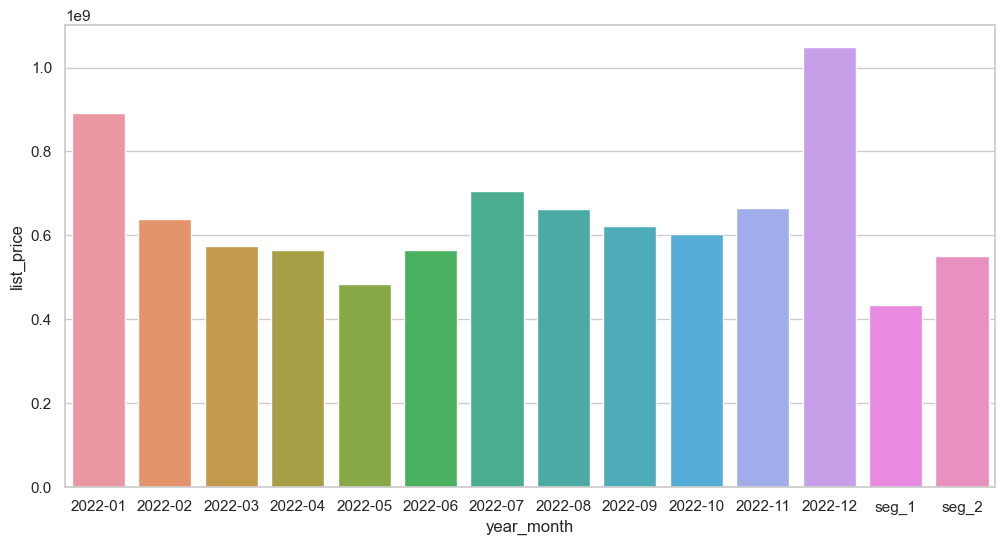

In [18]:
#연 월 데이터 분리
order_t['year_month'] = order_t['created_at'].dt.strftime('%Y-%m')
month_total = order_t.groupby('year_month').agg({
                                 'list_price' : 'sum',
                                 'sale_price' : 'sum',
                                 'discount_per' : 'mean'
                                 
}).reset_index()
month_total['discount_per'] = month_total['discount_per'].round(1)

## 5월6일 ~ 6월6일 데이터 분리
seg_1 = order_t[('2022-05-06' <= order_t['created_at']) & (order_t['created_at'] <= '2022-06-06')]
month_total_1 = seg_1.groupby('type').agg({
                                 'list_price' : 'sum',
                                 'sale_price' : 'sum',
                                 'discount_per' : 'mean'
                                 
}).reset_index()
month_total_1['discount_per'] = month_total_1['discount_per'].round(1)

#10월 13일 ~ 11월 13일 데이터 분리
seg_2 = order_t[('2022-10-13' <= order_t['created_at']) & (order_t['created_at'] <= '2022-11-13')]
month_total_2 = seg_2.groupby('type').agg({
                                 'list_price' : 'sum',
                                 'sale_price' : 'sum',
                                 'discount_per' : 'mean'
                                 
}).reset_index()
month_total_2['discount_per'] = month_total_2['discount_per'].round()

#데이터 프레임 결합
merge_df = pd.concat([month_total_1,month_total_2],axis=0).reset_index()
merge_df.rename(columns = {'type' : 'year_month'}, inplace = True)
merge_df.loc[0, 'year_month'] = 'seg_1'
merge_df.loc[1, 'year_month'] = 'seg_2'

merge_df_ = pd.concat([month_total,merge_df],axis=0)

plt.figure(figsize=(12,6))
sns.set(style="whitegrid")
sns.barplot(data = merge_df_, x = 'year_month', y = 'list_price')


### 할인율의 영향을 많이 받는 강의 추출

좀 더 세분화해서, 강의 별 할인을의 영향을 많이 받는 데이터를 찾아서 포인트 추출.\
우선적으로 상위 매출을 담당하는 강의들의 매출을 분석해보겠다.

In [19]:
#분석용 데이터셋 설정
order_d = order_t.copy()
order_d

,id,type,state,name,created_at,updated_at,customer_id,list_price,sale_price,discount_price,tax_free_price,discount_per,year_month_day,year_month
0,1600585,ORDER,COMPLETED,[30일 수강] 엑,2022-12-31 23:42:49,2022-12-31 23:42:52,1083679,10000,0,10000,0,100.0,2022-12-31,2022-12
1,1600580,ORDER,COMPLETED,한번에 끝내는 재무,2022-12-31 23:39:01,2022-12-31 23:39:25,129176,40000,40000,0,40000,0.0,2022-12-31,2022-12
2,1600579,ORDER,COMPLETED,네오아카데미 : 까,2022-12-31 23:38:31,2022-12-31 23:39:17,1072552,20000,10000,10000,10000,50.0,2022-12-31,2022-12
3,1600577,ORDER,COMPLETED,백엔드 개발자를 위,2022-12-31 23:35:52,2022-12-31 23:36:09,1083664,20000,20000,10000,20000,50.0,2022-12-31,2022-12
4,1600574,ORDER,COMPLETED,React Nati,2022-12-31 23:30:51,2022-12-31 23:31:13,1033553,20000,20000,0,20000,0.0,2022-12-31,2022-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284030,773397,ORDER,COMPLETED,한 번에 끝내는 딥,2022-01-01 00:18:42,2022-01-01 00:18:44,753996,30000,0,30000,0,100.0,2022-01-01,2022-01
284031,773396,ORDER,COMPLETED,초격차 패키지 :,2022-01-01 00:18:33,2022-01-01 00:18:57,12693,30000,30000,0,30000,0.0,2022-01-01,2022-01
284032,773394,ORDER,CANCELLED,한 번에 끝내는 딥,2022-01-01 00:17:19,2022-01-01 00:17:29,753996,30000,30000,0,30000,0.0,2022-01-01,2022-01
284033,773392,ORDER,PENDING,초격차 패키지 :,2022-01-01 00:13:43,2022-01-01 00:13:43,12693,30000,30000,0,30000,0.0,2022-01-01,2022-01


In [20]:
##강의 별 매출 합, 구매건수 집계
order_d_ = order_d.groupby('name').agg({'list_price' : 'sum', 'id' : 'count'
}).reset_index().sort_values(by = 'list_price', ascending= False)

## 강의 매출, 구매건수 비율 집계
order_d_['list_per'] = ((order_d_['list_price'] / order_d_['list_price'].sum()) * 100).round(1)
order_d_['id_per'] = ((order_d_['id'] / order_d_['id'].sum()) * 100).round(1)

order_d_.head(10)

,name,list_price,id,list_per,id_per
868,초격차 패키지 :,444770000,14994,5.5,5.3
195,The RED :,332810000,11772,4.1,4.1
800,올인원 패키지 :,299100000,11621,3.7,4.1
476,[평생수강 강의],195980000,7495,2.4,2.6
917,패스트캠퍼스 개발,138100000,1381,1.7,0.5
1077,한 번에 끝내는 컴,125360000,3787,1.6,1.3
598,네오아카데미 : 완,124110000,4137,1.5,1.5
1082,한 번에 끝내는 프,124020000,4131,1.5,1.5
1062,한 번에 끝내는 데,119640000,3991,1.5,1.4
710,블렌더로 만드는 동,116130000,3871,1.4,1.4


약 1100개의 강의 중 4개의 강의에서 전체 매출과 구매건수의 약 16%의 비율을 차지했다.\
이 강의들이 언제 발생했는지 전체 데이터에 포인트를 찍어보겠다. 

In [21]:
# 매출 상위 4개 강의 판매 분석
dates_chogyeokcha = list(order_d[order_d['name'].str.contains('초격차 패키지 :')]['year_month_day'].unique())
dates_thered = list(order_d[order_d['name'].str.contains('The RED :')]['year_month_day'].unique())
dates_allinone = list(order_d[order_d['name'].str.contains('올인원 패키지 :')]['year_month_day'].unique())
dates_lifetime = list(order_d[order_d['name'].str.contains('[평생수강 강의]')]['year_month_day'].unique())


# 시계열 그래프 생성
fig = go.Figure()

# 매출 합계에 대한 선 그래프 추가
fig.add_trace(go.Scatter(x=order_t_com['year_month_day'], y=order_t_com['list_price'],
                         mode='lines+markers', name='매출 합계'))

# 할인율 평균에 대한 선 그래프 추가
fig.add_trace(go.Scatter(x=order_t_com['year_month_day'], y=order_t_com['discount_per'],
                         mode='lines+markers', name='할인율 평균', yaxis='y2'))

# 초격차 패키지 판매 날짜에 대한 마커 추가
fig.add_trace(go.Scatter(x=pd.to_datetime(dates_chogyeokcha), y=[order_t_com[order_t_com['year_month_day'] == day]['list_price'].values[0] for day in dates_chogyeokcha],
                         mode='markers', marker=dict(symbol='circle', size=5, color='black'), name='초격차 패키지'))

# The RED 패키지 판매 날짜에 대한 마커 추가
fig.add_trace(go.Scatter(x=pd.to_datetime(dates_thered), y=[order_t_com[order_t_com['year_month_day'] == day]['list_price'].values[0] for day in dates_thered],
                         mode='markers', marker=dict(symbol='x', size=5, color='green'), name='The RED 패키지'))

# 올인원 패키지 판매 날짜에 대한 마커 추가
fig.add_trace(go.Scatter(x=pd.to_datetime(dates_allinone), y=[order_t_com[order_t_com['year_month_day'] == day]['list_price'].values[0] for day in dates_allinone],
                         mode='markers', marker=dict(symbol='triangle-up', size=5, color='yellow'), name='올인원 패키지'))

# 평생수강 강의 판매 날짜에 대한 마커 추가
fig.add_trace(go.Scatter(x=pd.to_datetime(dates_lifetime), y=[order_t_com[order_t_com['year_month_day'] == day]['list_price'].values[0] for day in dates_lifetime],
                         mode='markers', marker=dict(symbol='square', size=5, color='purple'), name='평생수강 강의'))

# 레이아웃 설정
fig.update_layout(title='일별 매출량과 할인율 그래프 및 특정 강의 판매 마커',
                  xaxis_title='날짜',
                  yaxis_title='매출 합계',
                  yaxis2=dict(title='할인율 평균', overlaying='y', side='right'),
                  legend=dict(x=0.01, y=0.99, bordercolor='Black', borderwidth=1))

# 그래프 출력
fig.show()

상위 4개의 강의는 판매 주기를 가지지 않고 매일 판매가 이루어짐을 알 수 있다.

In [23]:
order_count = order_t.groupby(['customer_id']).size().reset_index(name='count')
order_count

,customer_id,count
0,37,4
1,46,3
2,52,1
3,56,3
4,86,1
...,...,...
101714,1083649,1
101715,1083664,1
101716,1083669,1
101717,1083679,1


## 결론